In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_excel('Disease-dataset1.xlsx')
# df.head(5)

In [3]:
# Drop the unwanted columns
# df.drop(columns=['No', 'Patient Name'], inplace=True)
      # or
df = df.drop(columns=['No', 'Patient Name'])

# df.head(5)

In [4]:

df['Disease'].isnull().sum()

df['Disease'] = df['Disease'].fillna('Hiv/Aids')

df['Disease'].isnull().sum()


0

In [5]:
null_counts = df.isnull().sum()
# print(null_counts)
# Replace NaN values in 'Area Name' and 'Age' columns with backward fill method
df[['Area', 'Age']] = df[['Area', 'Age']].fillna(method='bfill', axis=0)


C:\Users\nitis\AppData\Local\Temp\ipykernel_8556\3959847760.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Area', 'Age']] = df[['Area', 'Age']].fillna(method='bfill', axis=0)


In [6]:
null_counts = df.isnull().sum()
print(null_counts)
df.head(5)

Date       0
Gender     0
Age        0
Area       0
Disease    0
dtype: int64


,Date,Gender,Age,Area,Disease
0,2018-10-15,FEMALE,61.0,SONPUR,Dengue
1,2018-10-15,FEMALE,49.0,BARAUNI,Hiv/Aids
2,2018-10-15,FEMALE,49.0,BARAUNI,Chikungunya
3,2018-10-15,FEMALE,66.0,DARBHANGA,Asthma
4,2018-10-15,FEMALE,55.0,VAISHALI,Dengue


In [7]:

# df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

df.drop(columns=['Date'], inplace=True)

# Display the DataFrame with the 'Year' column
print(df[['Year']])

df.head(5)

        Year
0       2018
1       2018
2       2018
3       2018
4       2018
...      ...
160145  2024
160146  2024
160147  2024
160148  2024
160149  2024

[160150 rows x 1 columns]


,Gender,Age,Area,Disease,Year
0,FEMALE,61.0,SONPUR,Dengue,2018
1,FEMALE,49.0,BARAUNI,Hiv/Aids,2018
2,FEMALE,49.0,BARAUNI,Chikungunya,2018
3,FEMALE,66.0,DARBHANGA,Asthma,2018
4,FEMALE,55.0,VAISHALI,Dengue,2018


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160150 entries, 0 to 160149
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Gender   160150 non-null  object 
 1   Age      160150 non-null  float64
 2   Area     160150 non-null  object 
 3   Disease  160150 non-null  object 
 4   Year     160150 non-null  int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 5.5+ MB


In [9]:
# For plot the disease and Area
Type_of_Disease = df['Disease'].unique()
Type_of_Disease = Type_of_Disease[:-1]
print(Type_of_Disease)

Type_of_Area = df['Area'].unique()
Type_of_Area = Type_of_Area[:-1]
Type_of_Area

['Dengue' 'Hiv/Aids' 'Chikungunya' 'Asthma' 'Diabetes' 'Rabies'
 'Kala-azar' 'COVID' 'Malaria' 'Tuberculosis (TB)']


array(['SONPUR', 'BARAUNI', 'DARBHANGA', 'VAISHALI', 'MUZAFFARPUR',
       'KHAGARIA', 'BEGUSARAI', 'SAMASTIPUR', 'BUXAR', 'BHOJPUR',
       'ROHTAS', 'HASANPUR', 'JAMAUI', 'BHAGALPUR'], dtype=object)

In [10]:
# Assuming df is your DataFrame with the 'Area' column
area_counts = df['Area'].value_counts()

# Print the counts
print(area_counts)
df['Area'].unique()


Area
BARAUNI        53082
BEGUSARAI      22113
DARBHANGA      18642
SAMASTIPUR     16008
MUZAFFARPUR    14446
KHAGARIA       12211
VAISHALI        7316
BUXAR           5182
ROHTAS          4193
SONPUR          2412
KATIHAR         1752
BHOJPUR         1381
JAMAUI           563
HASANPUR         446
BHAGALPUR        403
Name: count, dtype: int64


array(['SONPUR', 'BARAUNI', 'DARBHANGA', 'VAISHALI', 'MUZAFFARPUR',
       'KHAGARIA', 'BEGUSARAI', 'SAMASTIPUR', 'BUXAR', 'BHOJPUR',
       'ROHTAS', 'HASANPUR', 'JAMAUI', 'BHAGALPUR', 'KATIHAR'],
      dtype=object)

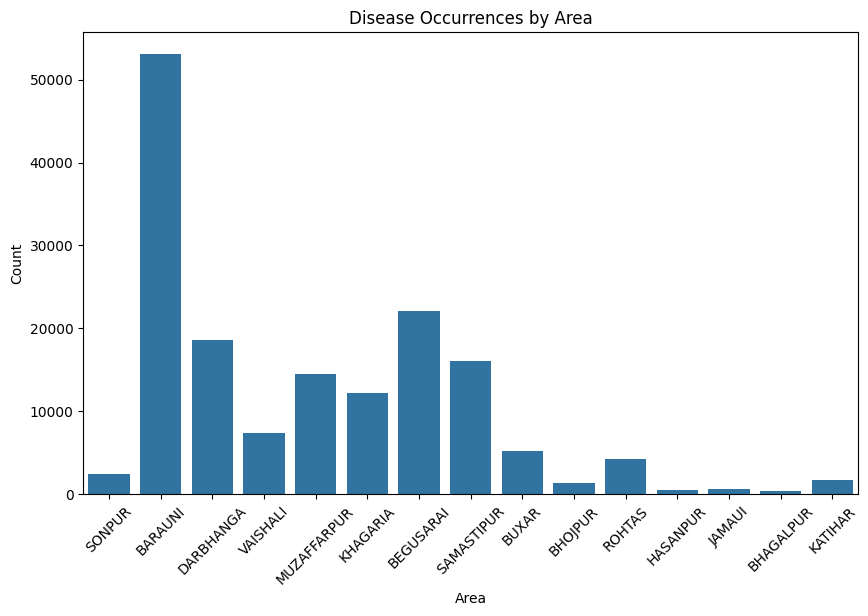

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Area', data=df)
plt.title('Disease Occurrences by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

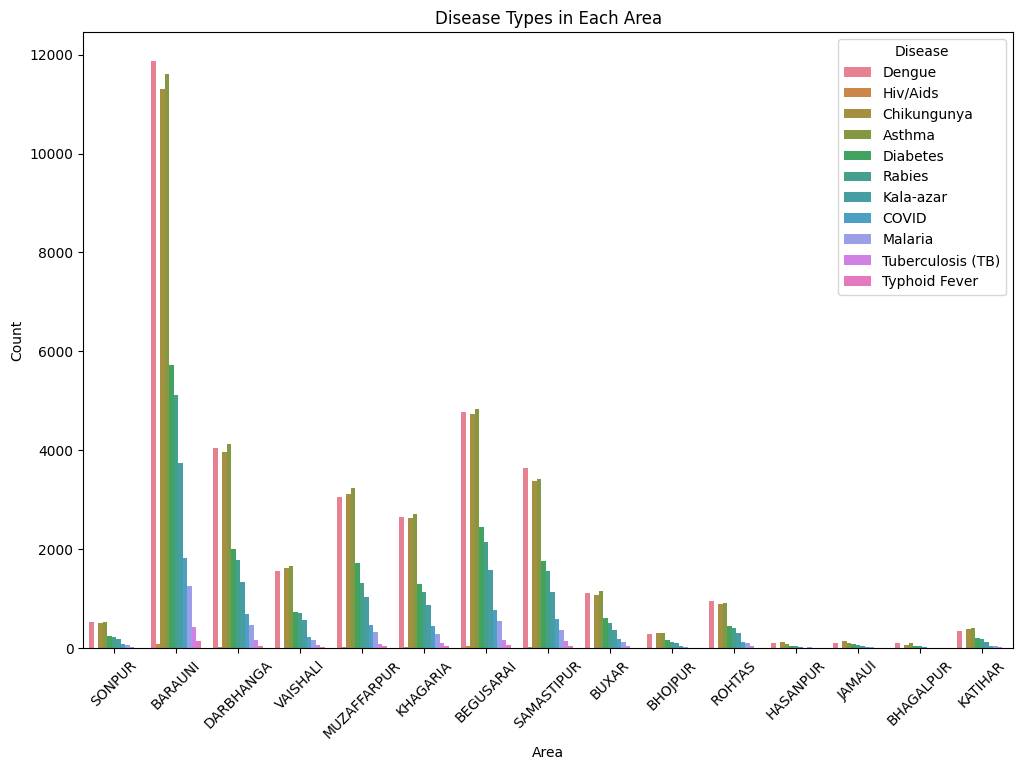

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Area', hue='Disease', data=df)
plt.title('Disease Types in Each Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disease', loc='upper right')
plt.show()

In [13]:
df.head()

,Gender,Age,Area,Disease,Year
0,FEMALE,61.0,SONPUR,Dengue,2018
1,FEMALE,49.0,BARAUNI,Hiv/Aids,2018
2,FEMALE,49.0,BARAUNI,Chikungunya,2018
3,FEMALE,66.0,DARBHANGA,Asthma,2018
4,FEMALE,55.0,VAISHALI,Dengue,2018


In [14]:

# Group by State, Disease, and Year and count occurrences
state_disease_year_counts = df.groupby(['Area', 'Disease', 'Year']).size().reset_index(name='Count')

# Pivot the table to have years as columns
state_disease_year_pivot = state_disease_year_counts.pivot_table(index=['Area', 'Disease'], columns='Year', values='Count', fill_value=0)

# Reset index to make Area and Disease as columns
state_disease_year_pivot.reset_index(inplace=True)

# Rename index name
state_disease_year_pivot.columns.name = None

# Rename columns
state_disease_year_pivot.columns = ['State', 'Disease', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Print the new dataset
print(state_disease_year_pivot)


        State            Disease   2018    2019    2020    2021    2022  \
0     BARAUNI             Asthma  449.0  2134.0  2169.0  2157.0  2178.0   
1     BARAUNI              COVID   71.0   373.0   357.0   324.0   311.0   
2     BARAUNI        Chikungunya  474.0  2079.0  2112.0  2205.0  2049.0   
3     BARAUNI             Dengue  446.0  2216.0  2192.0  2278.0  2196.0   
4     BARAUNI           Diabetes  229.0  1146.0  1048.0  1041.0  1036.0   
..        ...                ...    ...     ...     ...     ...     ...   
157  VAISHALI          Kala-azar   25.0   107.0   102.0    89.0   107.0   
158  VAISHALI            Malaria   10.0    29.0    28.0    28.0    33.0   
159  VAISHALI             Rabies   32.0   133.0   145.0   107.0   138.0   
160  VAISHALI  Tuberculosis (TB)    2.0    11.0     9.0     8.0    15.0   
161  VAISHALI      Typhoid Fever    0.0     2.0     2.0     4.0     4.0   

       2023   2024  
0    2135.0  393.0  
1     317.0   59.0  
2    1994.0  395.0  
3    2172.0  36

In [15]:
file_path = 'state_disease_counts.xlsx'

# Save the DataFrame to an Excel file
state_disease_year_pivot.to_excel(file_path, index=False)

In [16]:
new_df = pd.read_excel('state_disease_counts.xlsx')
new_df.head(5)

,State,Disease,2018,2019,2020,2021,2022,2023,2024
0,BARAUNI,Asthma,449,2134,2169,2157,2178,2135,393
1,BARAUNI,COVID,71,373,357,324,311,317,59
2,BARAUNI,Chikungunya,474,2079,2112,2205,2049,1994,395
3,BARAUNI,Dengue,446,2216,2192,2278,2196,2172,364
4,BARAUNI,Diabetes,229,1146,1048,1041,1036,1029,199


In [17]:
states = new_df['State'].unique()
# states = states[:-1]
states

array(['BARAUNI', 'BEGUSARAI', 'BHAGALPUR', 'BHOJPUR', 'BUXAR',
       'DARBHANGA', 'HASANPUR', 'JAMAUI', 'KATIHAR', 'KHAGARIA',
       'MUZAFFARPUR', 'ROHTAS', 'SAMASTIPUR', 'SONPUR', 'VAISHALI'],
      dtype=object)

In [18]:
years = [str(i) for i in range(2018, 2025)]
years

['2018', '2019', '2020', '2021', '2022', '2023', '2024']

In [19]:
Type_of_Disease

array(['Dengue', 'Hiv/Aids', 'Chikungunya', 'Asthma', 'Diabetes',
       'Rabies', 'Kala-azar', 'COVID', 'Malaria', 'Tuberculosis (TB)'],
      dtype=object)

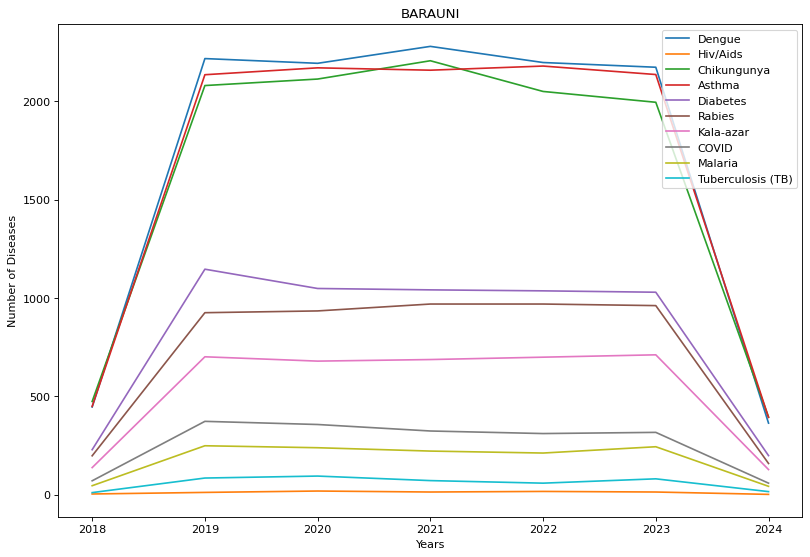

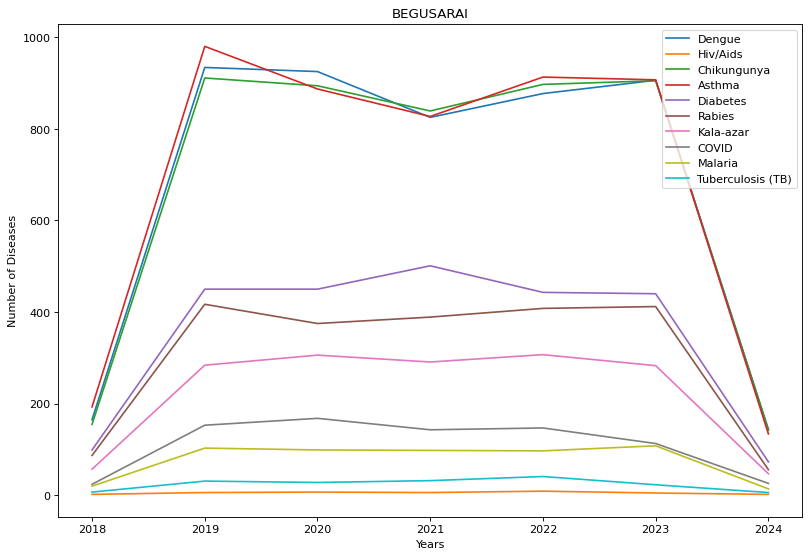

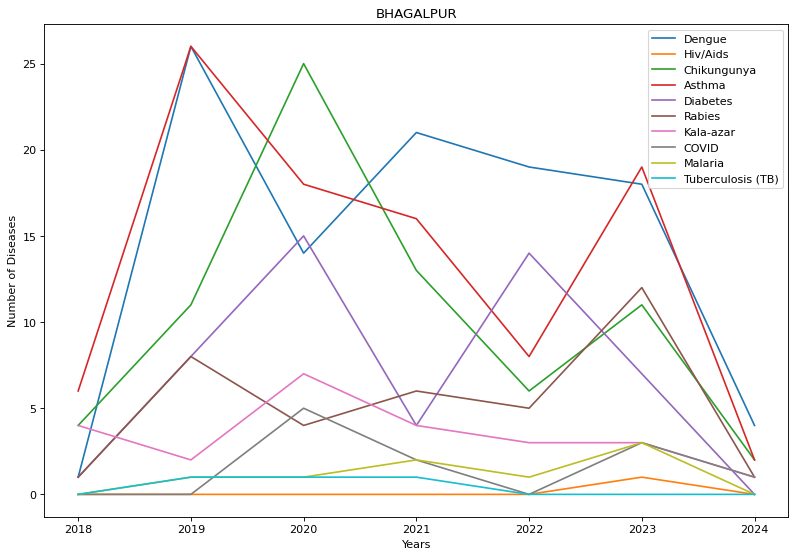

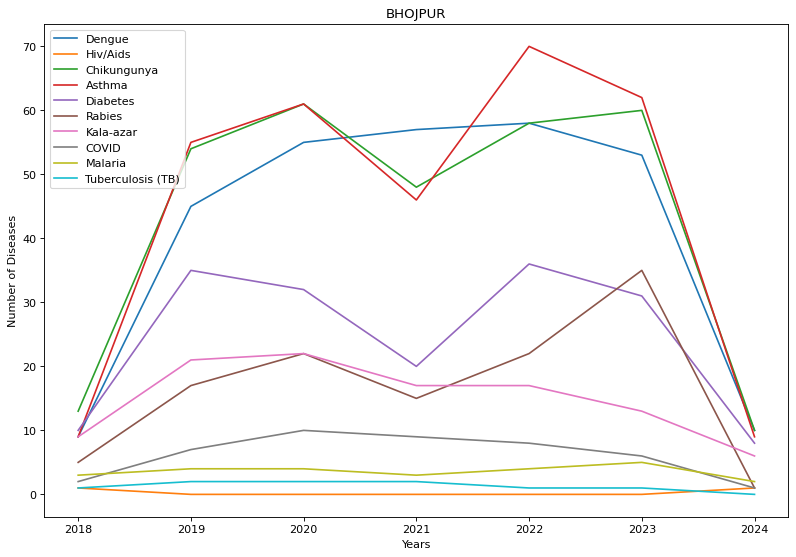

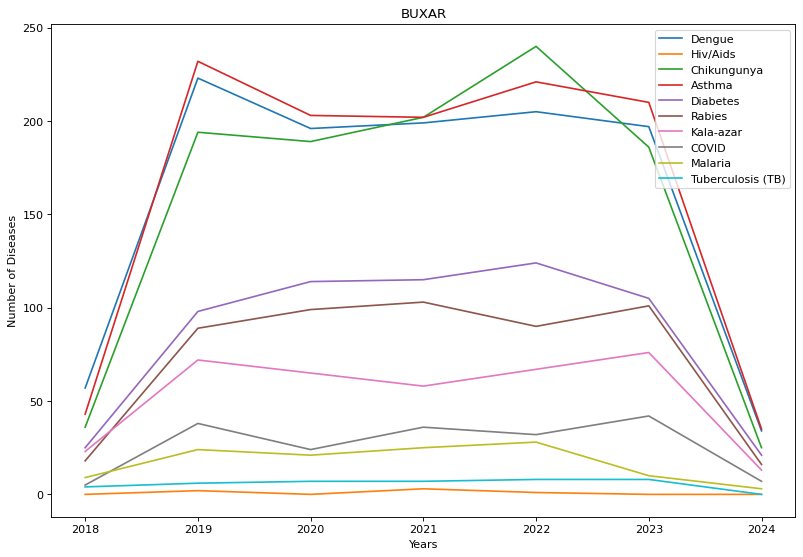

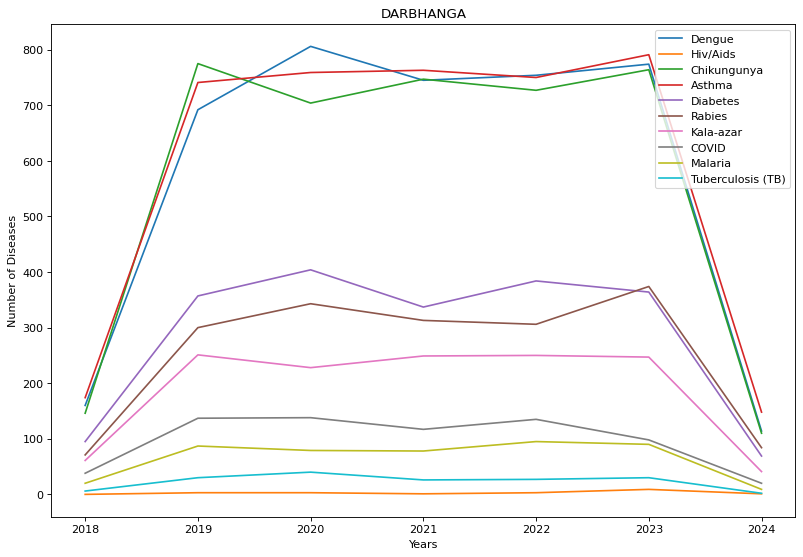

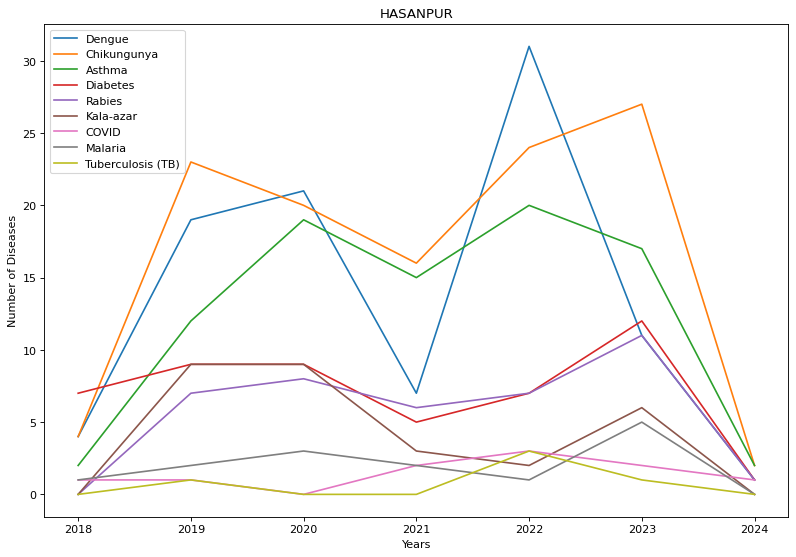

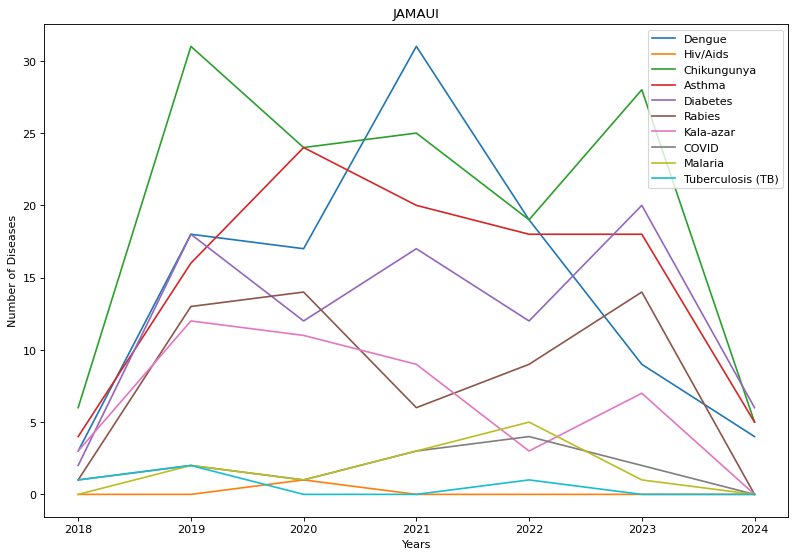

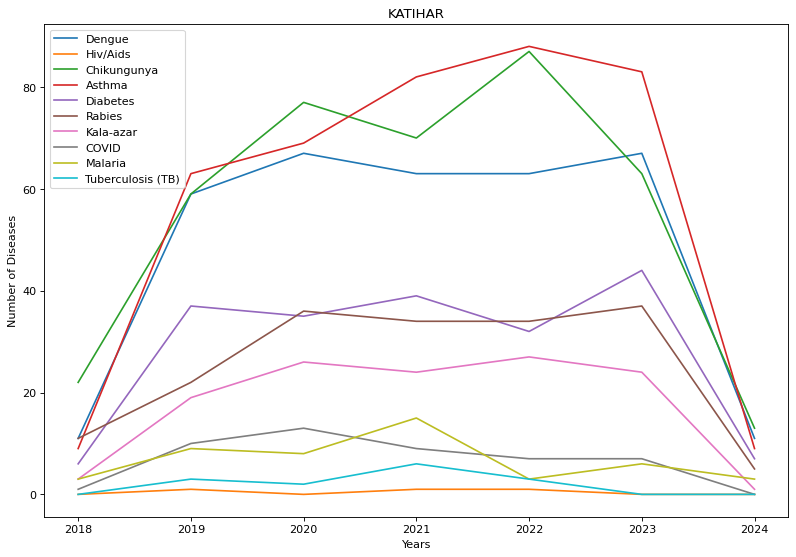

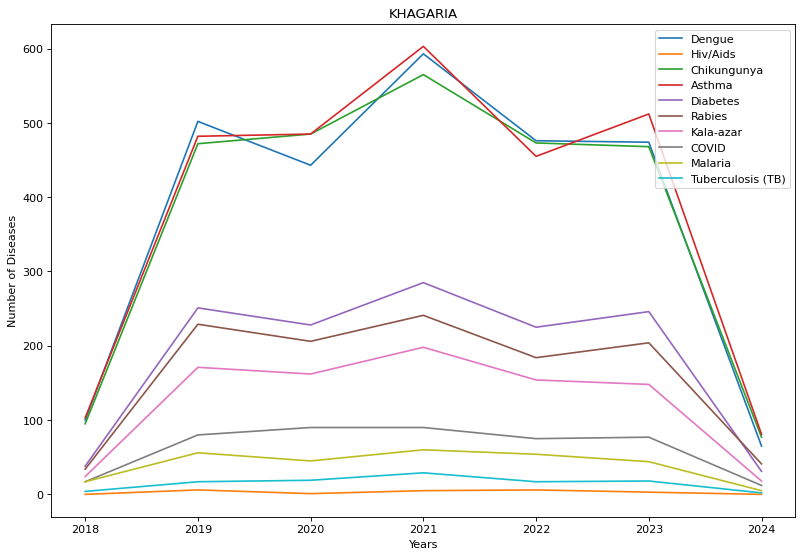

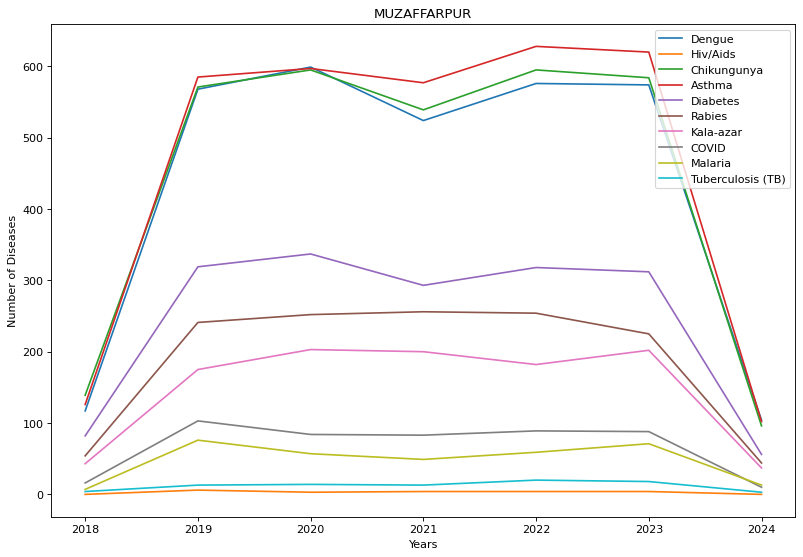

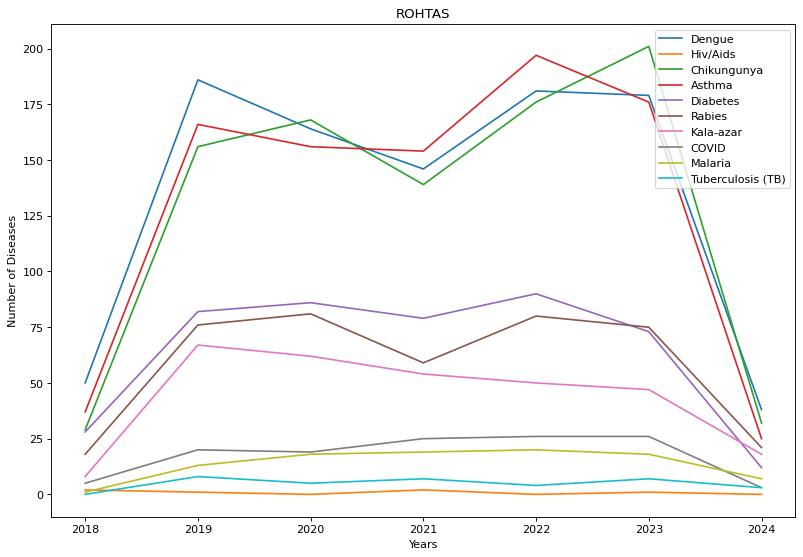

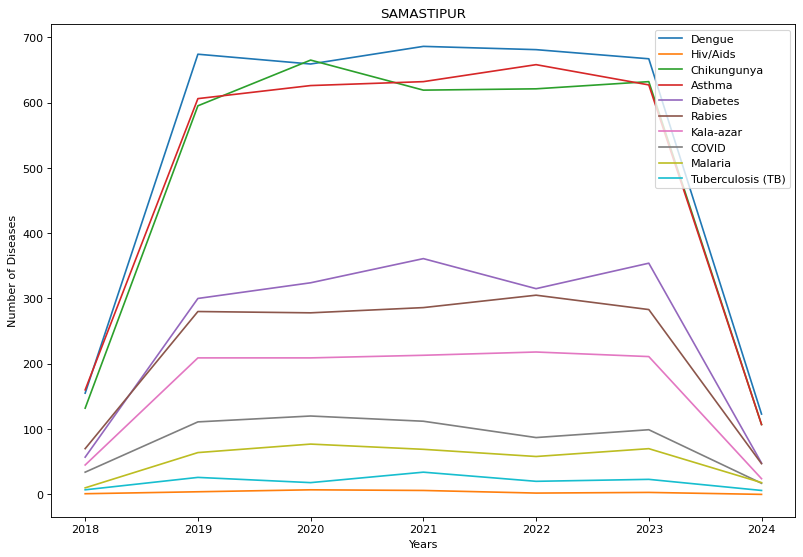

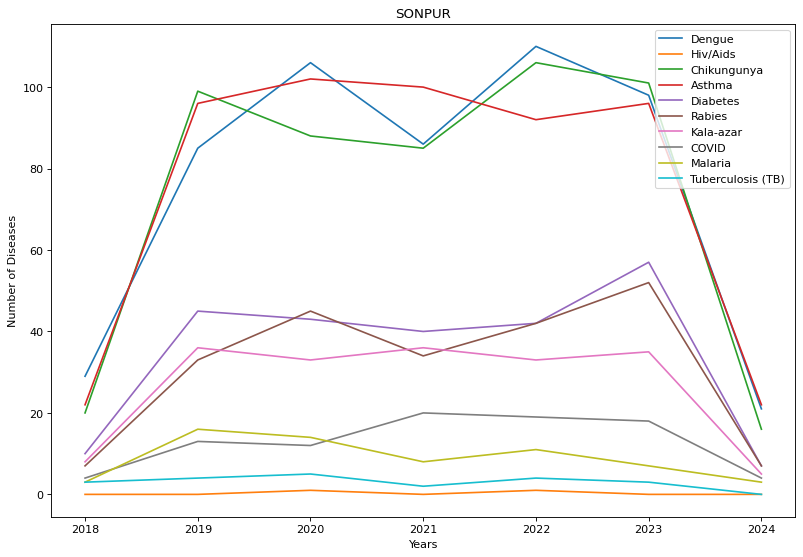

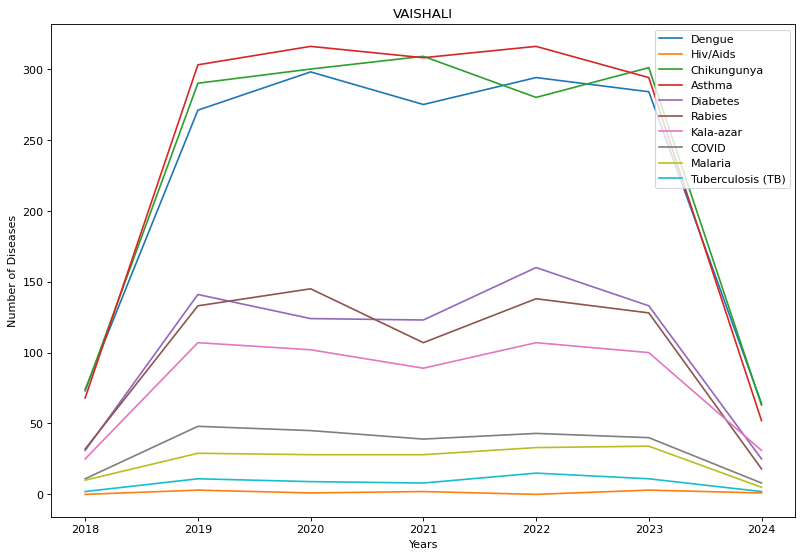

In [20]:
for state in states:
    fig = plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k') 
    plt.title(state)
    plt.xlabel('Years')
    plt.ylabel('Number of Diseases')
    for disease in Type_of_Disease:
        temp_df = new_df[(new_df['State'] == state) & (new_df['Disease'] == disease)]
        if not temp_df.empty:  # Check if temp_df is not empty
            N_case = [temp_df[c].values[0] for c in years]
            plt.plot(years, N_case, label=disease)
    plt.legend()
    plt.show()


In [21]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()

new_df['Disease'] = lab.fit_transform(new_df['Disease'])

new_df.tail()

,State,Disease,2018,2019,2020,2021,2022,2023,2024
157,VAISHALI,6,25,107,102,89,107,100,31
158,VAISHALI,7,10,29,28,28,33,34,5
159,VAISHALI,8,32,133,145,107,138,128,18
160,VAISHALI,9,2,11,9,8,15,11,2
161,VAISHALI,10,0,2,2,4,4,3,0


In [22]:
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters=3)

KMeans.fit(new_df.iloc[:, 1:])

KMeans(n_clusters=3)

In [23]:
KMeans.cluster_centers_

array([[5.33333333e+00, 1.47101449e+01, 6.68260870e+01, 6.76666667e+01,
        6.58478261e+01, 6.73333333e+01, 6.67898551e+01, 1.17391304e+01],
       [2.80952381e+00, 1.41238095e+02, 6.70666667e+02, 6.67571429e+02,
        6.67047619e+02, 6.67619048e+02, 6.72476190e+02, 1.11333333e+02],
       [1.66666667e+00, 4.56333333e+02, 2.14300000e+03, 2.15766667e+03,
        2.21333333e+03, 2.14100000e+03, 2.10033333e+03, 3.84000000e+02]])

In [24]:
labels = KMeans.labels_
labels

array([2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [25]:

# Assuming KMeans.labels_ contains the labels from KMeans clustering
unique, counts = np.unique(KMeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print(dict_data)

{0: 138, 1: 21, 2: 3}


In [26]:
new_df["cluster"] = KMeans.labels_
new_df.head()


,State,Disease,2018,2019,2020,2021,2022,2023,2024,cluster
0,BARAUNI,0,449,2134,2169,2157,2178,2135,393,2
1,BARAUNI,1,71,373,357,324,311,317,59,0
2,BARAUNI,2,474,2079,2112,2205,2049,1994,395,2
3,BARAUNI,3,446,2216,2192,2278,2196,2172,364,2
4,BARAUNI,4,229,1146,1048,1041,1036,1029,199,1


In [27]:
new_df.head(100)
new_df
# Assuming train_data is your DataFrame containing the training data
new_df.to_excel("train_data.xlsx", index=False)




In [28]:
KMeans.inertia_

9538301.550724639

In [29]:
KMeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=3)>

In [30]:
new_df

,State,Disease,2018,2019,2020,2021,2022,2023,2024,cluster
0,BARAUNI,0,449,2134,2169,2157,2178,2135,393,2
1,BARAUNI,1,71,373,357,324,311,317,59,0
2,BARAUNI,2,474,2079,2112,2205,2049,1994,395,2
3,BARAUNI,3,446,2216,2192,2278,2196,2172,364,2
4,BARAUNI,4,229,1146,1048,1041,1036,1029,199,1
...,...,...,...,...,...,...,...,...,...,...
157,VAISHALI,6,25,107,102,89,107,100,31,0
158,VAISHALI,7,10,29,28,28,33,34,5,0
159,VAISHALI,8,32,133,145,107,138,128,18,0
160,VAISHALI,9,2,11,9,8,15,11,2,0
